In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import pickle 

In [3]:
path = 'fibronectin/*/*.npz'

In [4]:
npz_files = glob(path) 

In [5]:
print(npz_files)
print(len(npz_files))

['fibronectin\\20200722_Preo_Hela_fn\\A4_seg.npz', 'fibronectin\\20200722_Preo_Hela_fn\\B4_seg.npz', 'fibronectin\\20200722_Preo_Hela_fn\\C4_seg.npz', 'fibronectin\\20200729_Preo_Hela_fn\\B4_seg.npz', 'fibronectin\\20200729_Preo_Hela_fn\\C4_seg.npz', 'fibronectin\\20210526_LCLC_fn\\A1_seg.npz', 'fibronectin\\20210526_LCLC_fn\\A2_seg.npz', 'fibronectin\\20210526_LCLC_fn\\A3_seg.npz', 'fibronectin\\20210526_LCLC_fn\\A4_seg.npz', 'fibronectin\\20210526_LCLC_fn\\B1_seg.npz', 'fibronectin\\20210526_LCLC_fn\\B2_seg.npz', 'fibronectin\\20210526_LCLC_fn\\B3_seg.npz', 'fibronectin\\20210526_LCLC_fn\\B4_seg.npz', 'fibronectin\\20210526_LCLC_fn\\C1_seg.npz', 'fibronectin\\20210526_LCLC_fn\\C2_seg.npz', 'fibronectin\\20210526_LCLC_fn\\C3_seg.npz', 'fibronectin\\20210526_MCF7_fn\\A1_seg.npz', 'fibronectin\\20210526_MCF7_fn\\A2_seg.npz', 'fibronectin\\20210526_MCF7_fn\\A3_seg.npz', 'fibronectin\\20210526_MCF7_fn\\A4_seg.npz', 'fibronectin\\20210526_MCF7_fn\\B1_seg.npz', 'fibronectin\\20210526_MCF7_f

In [6]:
biosensor = []
microscope = []
masks = []

In [7]:
for file in npz_files:
    with np.load(file) as data:
        biosensor.append(data['well'] )
        microscope.append(data['im_mic'])
        masks.append(data['im_markers'])

In [8]:
data_len = len(biosensor)
print(data_len)

90


In [9]:
# The biosensor length is not the same for all the files
avg_time = np.mean([bio.shape[0] for bio in biosensor])
std_time = np.std([bio.shape[0] for bio in biosensor])
min_time = np.min([bio.shape[0] for bio in biosensor])
max_time = np.max([bio.shape[0] for bio in biosensor])
print(avg_time, std_time, min_time, max_time)

984.0777777777778 245.44061186082735 642 1418


In [10]:
# The mask or the microscope image is not the same for all the files
avg_mask = np.mean([mask.shape[0] for mask in masks])
std_mask = np.std([mask.shape[0] for mask in masks])
min_mask = np.min([mask.shape[0] for mask in masks])
max_mask = np.max([mask.shape[0] for mask in masks])
print(avg_mask, std_mask, min_mask, max_mask)

4158.277777777777 87.17989418792205 3566 4253


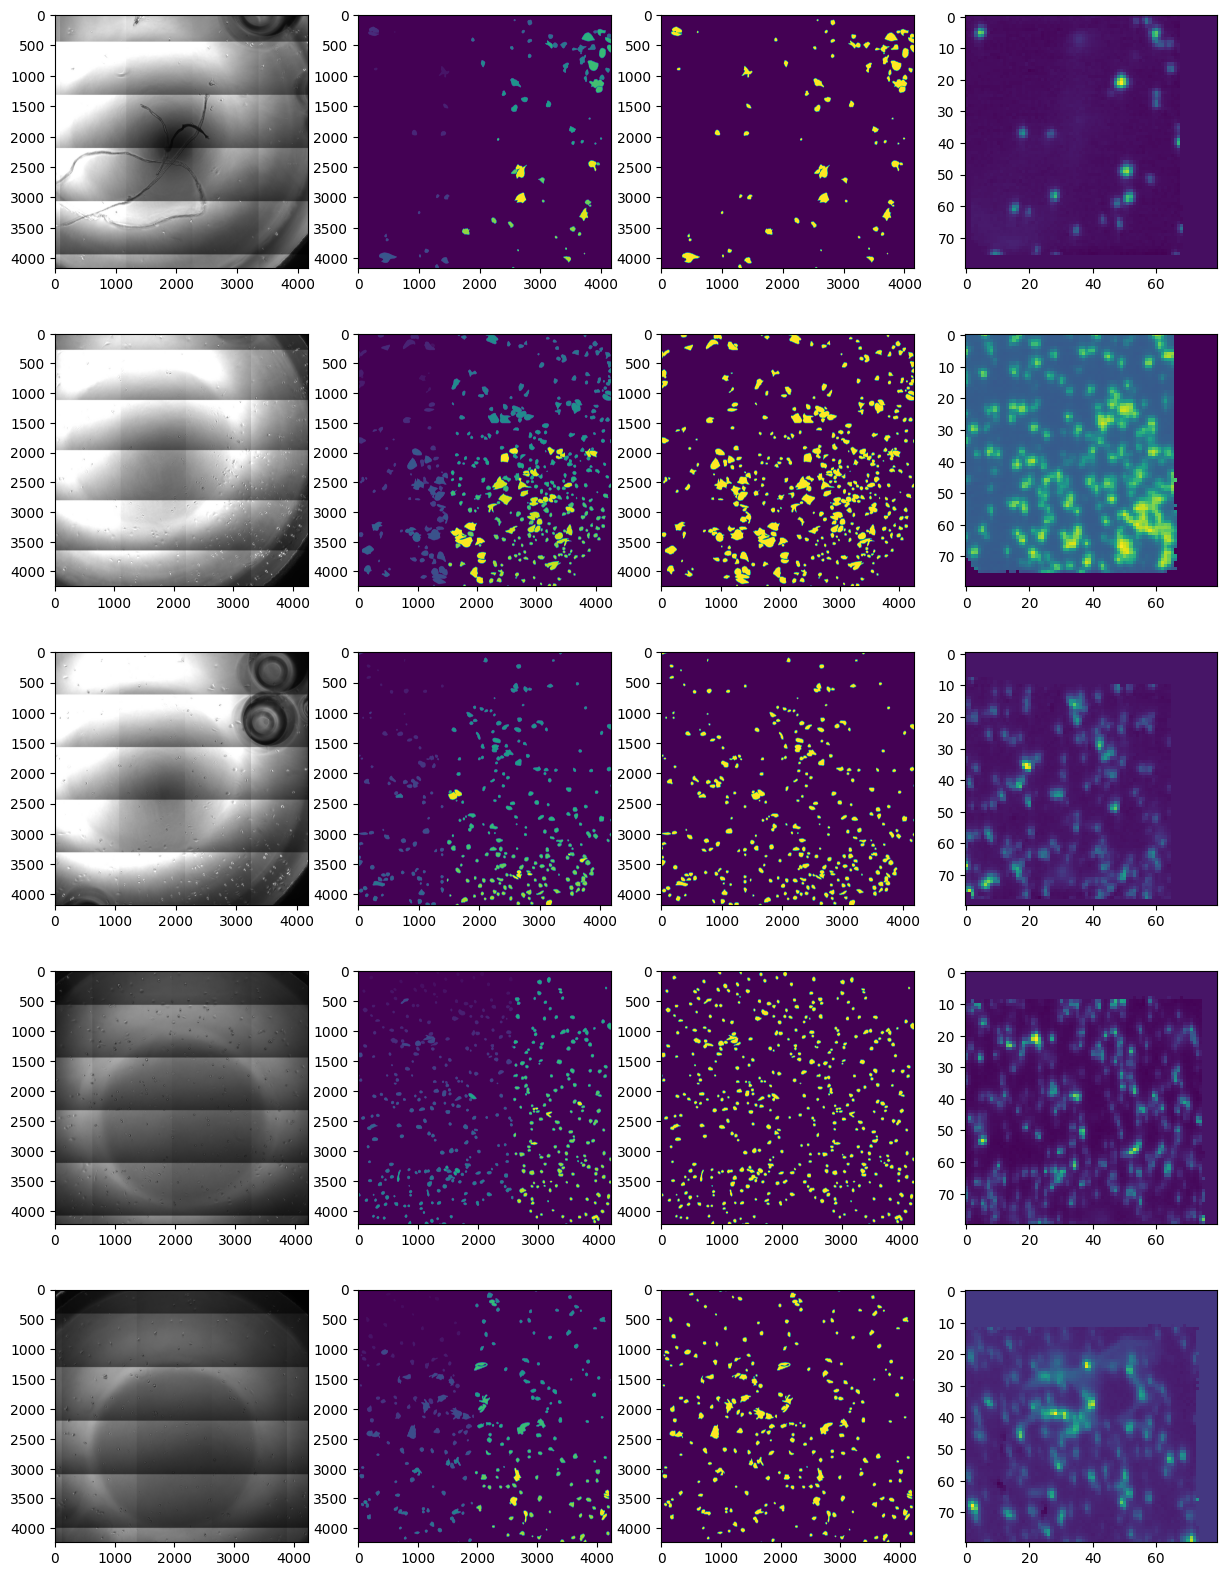

In [27]:
fig, axs = plt.subplots(5, 4, figsize=(15, 20))

for i in range(5):
    axs[i, 0].imshow(microscope[i])
    axs[i, 1].imshow(masks[i])
    axs[i, 2].imshow(boolean_masks[i])
    axs[i, 3].imshow(biosensor[i][-100])

plt.show()

In [4]:
# To display all the elements of the matrix
np.set_printoptions(threshold=np.inf)

In [26]:
print(masks[0][500])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [21]:
import copy
boolean_masks = copy.deepcopy(masks)

In [24]:
# creating boolean masks
for mask in boolean_masks:
    mask[mask > 0] = 1

In [25]:
print(boolean_masks[0][500])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [14]:
# with open('pickles/biosensor.pkl', 'wb') as out_file:
#     pickle.dump(biosensor, out_file)
    
# with open('pickles/microscope.pkl', 'wb') as out_file:
#     pickle.dump(microscope, out_file)
    
# with open('pickles/masks.pkl', 'wb') as out_file:
#     pickle.dump(masks, out_file)

In [28]:
# with open('pickles/boolean_masks.pkl', 'wb') as out_file:
#     pickle.dump(boolean_masks, out_file)

In [20]:
# with open('pickles/biosensor.pkl', 'rb') as in_file:
#     biosensor = pickle.load(in_file)

# with open('pickles/microscope.pkl', 'rb') as in_file:
#     microscope = pickle.load(in_file)
    
# with open('pickles/masks.pkl', 'rb') as in_file:
#     masks = pickle.load(in_file)

# with open('pickles/boolean_masks.pkl', 'rb') as in_file:
#     boolean_masks = pickle.load(in_file)